In [337]:
import pandas as pd

cm_features = pd.read_csv('data/cm_features_with_name.csv')
cm_features.head(10)

,month_id,country_id,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,...,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5,country,date
0,467,1,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.073546,1.708305,3.298402,315701.223506,355000.130996,0.000129,1.029498,1.117986,Guyana,2018-11-01
1,467,2,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.902676,7.305286,3.950609,178935.173052,178935.173052,0.000003,0.057337,1.000001,Suriname,2018-11-01
2,467,3,52,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,56.824162,62.878594,20.326481,2818.669280,2818.669280,0.000000,0.000000,0.000000,Trinidad and Tobago,2018-11-01
3,467,4,101,0.0,0.0,8.0,20.0,6.0,55.0,0.0,...,37.074382,14.740223,7.540367,26794.955811,44103.498696,1.000003,1.028869,1.012403,Venezuela,2018-11-01
4,467,5,990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Samoa,2018-11-01
5,467,6,972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tonga,2018-11-01
6,467,7,160,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,58.046051,12.937381,10.456664,6848.429778,20550.918181,0.000040,0.029502,1.001744,Argentina,2018-11-01
7,467,8,145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.277670,10.578589,1.177001,28347.220669,53612.206472,0.420487,0.279723,1.000091,Bolivia,2018-11-01
8,467,9,140,0.0,87.0,0.0,93.0,132.0,196.0,0.0,...,72.031792,23.644188,3.074326,27919.193185,42645.692187,1.420615,2.249602,0.132219,Brazil,2018-11-01
9,467,10,155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,109.749609,6.531353,20.215134,49834.002094,51977.145732,0.420451,0.250225,0.001828,Chile,2018-11-01


In [338]:
# drop all ged_sb_tlag_x except for the ged_sb_tlag_6
cm_features = cm_features.drop(columns=['country'])
cm_features = cm_features.drop(
    columns=['ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_1'])
# drop ged_sb, ged_ns, ged_os, acled_sb, acled_sb_ count, acled_os, ged_sb_tsum_24
cm_features = cm_features.drop(
    columns=['ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'ged_os_tlag_1'])
# drop splag_1_decay_ged_sb_5, splag_1_decay_ged_os_5, splag_1_decay_ged_ns_5, decay_ged_sb_5, decay_ged_os_5, decay_ged_sb_500, decay_ged_os_100, decay_ged_ns_5, decay_ged_ns_100, decay_acled_sb_5, decay_acled_os_5, decay_acled_ns_5
cm_features = cm_features.drop(
    columns=['splag_1_decay_ged_sb_5', 'splag_1_decay_ged_os_5', 'splag_1_decay_ged_ns_5', 'decay_ged_sb_5',
             'decay_ged_os_5', 'decay_ged_sb_500', 'decay_ged_os_100', 'decay_ged_ns_5', 'decay_ged_ns_100',
             'decay_acled_sb_5', 'decay_acled_os_5', 'decay_acled_ns_5', 'decay_ged_sb_100'])



In [339]:
# save first 50 rows of the dataset to a new csv file with column names
# cm_features.head(50).to_csv('data/cm_features_first_50.csv', index=True)
# cm_features.head(10)
# prepare dataset for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cm_features['date'] = pd.to_datetime(cm_features['date'])
cm_features['country_id'] = cm_features['country_id'].astype('category')
cm_features

,month_id,country_id,gleditsch_ward,wdi_sp_pop_totl,ged_sb_tlag_6,wdi_ag_lnd_frst_k2,wdi_dt_oda_odat_pc_zs,wdi_ms_mil_xpnd_gd_zs,wdi_ms_mil_xpnd_zs,wdi_nv_agr_totl_kd,...,groundwater_export_t48,fresh_withdrawal_pct_t48,ind_efficiency_t48,irr_agr_efficiency_t48,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,date
0,467,1,110,763252.0,0.0,184429.5,66.989672,1.650398,4.738403,1.090569e+09,...,0.00,0.533100,43.064647,0.083464,24.073546,1.708305,3.298402,315701.223506,355000.130996,2018-11-01
1,467,2,115,587559.0,0.0,152330.2,34.260388,0.000000,0.000000,4.996049e+08,...,0.00,0.622121,10.277652,0.927863,54.902676,7.305286,3.950609,178935.173052,178935.173052,2018-11-01
2,467,3,52,1478607.0,0.0,2294.5,3.077368,0.885040,2.751157,2.638550e+08,...,0.00,8.755208,81.939324,1.896849,56.824162,62.878594,20.326481,2818.669280,2818.669280,2018-11-01
3,467,4,101,30563433.0,0.0,464281.8,2.841631,2.233332,0.000000,0.000000e+00,...,0.00,1.707253,171.842331,0.434597,37.074382,14.740223,7.540367,26794.955811,44103.498696,2018-11-01
4,467,5,990,207630.0,0.0,1631.1,656.070901,0.000000,0.000000,8.112569e+07,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71637,502,242,510,61704518.0,0.0,457450.0,36.892922,1.026224,6.264563,1.551417e+10,...,0.00,5.384855,533.915267,0.183337,41.083011,6.915093,12.963241,1536.763246,1761.240449,2021-10-01
71638,502,243,600,36688772.0,3.0,57424.9,49.836229,4.281029,11.699027,1.180949e+10,...,0.03,36.458621,123.079497,0.401803,54.588834,8.417189,50.751212,815.035895,815.035895,2021-10-01
71639,502,244,435,4498604.0,0.0,3128.0,143.355589,2.451664,13.118402,1.619266e+09,...,0.00,11.826316,49.621098,0.326336,32.697300,3.774539,13.246217,93.401859,2661.952986,2021-10-01
71640,502,245,625,44440486.0,0.0,183595.5,52.839205,1.131726,9.096010,2.624730e+10,...,1.00,71.256614,197.787260,0.206783,53.047036,2.620623,118.656388,98.007034,926.166474,2021-10-01


In [340]:
from sklearn.preprocessing import OneHotEncoder

# Define the split date


# features_to_exclude = ['id', 'country', 'ged_sb_tlag_6']
# features = [col for col in cm_features.columns if col not in features_to_exclude]

# X_train = train_df[features]
# y_train = train_df['ged_sb_tlag_6']
# X_test = test_df[features]
# y_test = test_df['ged_sb_tlag_6']
# 
# X_train[features]

In [341]:
# One-hot encode 'country_id'
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
countries_encoded = encoder.fit_transform(cm_features[['country_id']])
countries_encoded = encoder.transform(cm_features[['country_id']])
# rename the columns
# X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['country_id']))
countries_encoded = pd.DataFrame(countries_encoded, columns=encoder.get_feature_names_out(['country_id']))
countries_encoded

/Users/zakotianskyi/Library/Caches/pypoetry/virtualenvs/my_project-FBv7emLR-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country_id_1,country_id_2,country_id_3,country_id_4,country_id_5,country_id_6,country_id_7,country_id_8,country_id_9,country_id_10,...,country_id_243,country_id_244,country_id_245,country_id_246,country_id_247,country_id_248,country_id_250,country_id_252,country_id_253,country_id_254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
# merge the encoded features with the original dataset
cm_features = pd.concat([cm_features, countries_encoded], axis=1)
cm_features.drop('country_id', axis=1, inplace=True)
cm_features

,month_id,gleditsch_ward,wdi_sp_pop_totl,ged_sb_tlag_6,wdi_ag_lnd_frst_k2,wdi_dt_oda_odat_pc_zs,wdi_ms_mil_xpnd_gd_zs,wdi_ms_mil_xpnd_zs,wdi_nv_agr_totl_kd,wdi_nv_agr_totl_kn,...,country_id_243,country_id_244,country_id_245,country_id_246,country_id_247,country_id_248,country_id_250,country_id_252,country_id_253,country_id_254
0,467,110,763252.0,0.0,184429.5,66.989672,1.650398,4.738403,1.090569e+09,2.447340e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,467,115,587559.0,0.0,152330.2,34.260388,0.000000,0.000000,4.996049e+08,1.707000e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,467,52,1478607.0,0.0,2294.5,3.077368,0.885040,2.751157,2.638550e+08,1.473140e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,467,101,30563433.0,0.0,464281.8,2.841631,2.233332,0.000000,0.000000e+00,2.516759e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,467,990,207630.0,0.0,1631.1,656.070901,0.000000,0.000000,8.112569e+07,2.188846e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71637,502,510,61704518.0,0.0,457450.0,36.892922,1.026224,6.264563,1.551417e+10,3.089478e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71638,502,600,36688772.0,3.0,57424.9,49.836229,4.281029,11.699027,1.180949e+10,1.071892e+11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71639,502,435,4498604.0,0.0,3128.0,143.355589,2.451664,13.118402,1.619266e+09,5.269637e+10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71640,502,625,44440486.0,0.0,183595.5,52.839205,1.131726,9.096010,2.624730e+10,6.582250e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [343]:
# Split the dataset into training and test sets
# split_date = pd.Timestamp(year=2020, month=10, day=31)

# Splitting the dataset
train_df = cm_features[cm_features['month_id'] <= 467]
test_df = cm_features[cm_features['month_id'] == 468]
# remove date column
train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)

In [344]:
target = 'ged_sb_tlag_6'
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]
X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

In [345]:
y_train

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
69345      0.0
69346      0.0
69347      0.0
69348     38.0
69349    143.0
Name: ged_sb_tlag_6, Length: 64957, dtype: float64

In [346]:
test_df

,month_id,gleditsch_ward,wdi_sp_pop_totl,ged_sb_tlag_6,wdi_ag_lnd_frst_k2,wdi_dt_oda_odat_pc_zs,wdi_ms_mil_xpnd_gd_zs,wdi_ms_mil_xpnd_zs,wdi_nv_agr_totl_kd,wdi_nv_agr_totl_kn,...,country_id_243,country_id_244,country_id_245,country_id_246,country_id_247,country_id_248,country_id_250,country_id_252,country_id_253,country_id_254
191,468,110,763252.0,0.0,184429.5,66.989672,1.650398,4.738403,1.090569e+09,2.447340e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,468,115,587559.0,0.0,152330.2,34.260388,0.000000,0.000000,4.996049e+08,1.707000e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,468,52,1478607.0,0.0,2294.5,3.077368,0.885040,2.751157,2.638550e+08,1.473140e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,468,101,30563433.0,0.0,464281.8,2.841631,2.233332,0.000000,0.000000e+00,2.516759e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,468,990,207630.0,0.0,1631.1,656.070901,0.000000,0.000000,8.112569e+07,2.188846e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,468,510,56267032.0,0.0,471520.0,45.952310,1.055796,6.370744,1.406649e+10,2.801189e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378,468,600,35528115.0,0.0,57115.9,68.330389,3.183041,10.592541,1.266895e+10,1.149901e+11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379,468,435,4160015.0,0.0,3292.0,70.127154,2.042273,10.449522,1.496238e+09,4.869262e+10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,468,625,40679828.0,30.0,188760.3,21.199941,3.507166,25.657448,2.783123e+10,6.979464e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [347]:
import xgboost as xgb

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Specify parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round, [(dtest, 'test')], early_stopping_rounds=10)

# Make predictions
predictions = bst.predict(dtest)
predictions

/Users/zakotianskyi/Library/Caches/pypoetry/virtualenvs/my_project-FBv7emLR-py3.10/lib/python3.10/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	test-rmse:139.81817
[1]	test-rmse:124.74546
[2]	test-rmse:111.94900
[3]	test-rmse:102.23242
[4]	test-rmse:93.31191
[5]	test-rmse:86.03149
[6]	test-rmse:79.31192
[7]	test-rmse:74.60802
[8]	test-rmse:71.25712
[9]	test-rmse:68.15116
[10]	test-rmse:66.58714
[11]	test-rmse:65.16965
[12]	test-rmse:64.18757
[13]	test-rmse:63.12097
[14]	test-rmse:63.22046
[15]	test-rmse:63.52026
[16]	test-rmse:64.29057
[17]	test-rmse:64.70174
[18]	test-rmse:65.95995
[19]	test-rmse:67.20833
[20]	test-rmse:67.42867
[21]	test-rmse:67.42252
[22]	test-rmse:67.79062
[23]	test-rmse:68.68408


array([4.1629443e+00, 2.4449003e+00, 2.4449003e+00, 5.8857868e+01,
       2.4449003e+00, 2.4449003e+00, 2.4449003e+00, 2.4449003e+00,
       9.6205587e+00, 2.4449003e+00, 2.4449003e+00, 2.4449003e+00,
       4.1687007e+00, 2.4449003e+00, 1.2624177e+01, 9.8781614e+00,
       2.6498454e+00, 2.4449003e+00, 2.4449003e+00, 2.4449003e+00,
       2.4449003e+00, 9.7194643e+00, 8.6962872e+00, 2.4449003e+00,
       2.4449003e+00, 2.4449003e+00, 2.3846537e+01, 2.4449003e+00,
       2.4449003e+00, 8.1165295e+00, 9.7194643e+00, 2.4449003e+00,
       2.4449003e+00, 2.4449003e+00, 2.4449003e+00, 2.4449003e+00,
       2.4449003e+00, 2.4449003e+00, 2.4449003e+00, 8.6962872e+00,
       4.6539154e+00, 2.4449003e+00, 2.4449003e+00, 2.4449003e+00,
       2.4449003e+00, 8.4344387e+00, 2.4449003e+00, 1.2110627e+01,
       8.6962872e+00, 2.4449003e+00, 2.4449003e+00, 4.3994212e+00,
       5.9885372e+01, 1.3698748e+01, 2.4449003e+00, 3.3005081e+02,
       3.9086688e+00, 2.4449003e+00, 2.4449003e+00, 2.3291313e

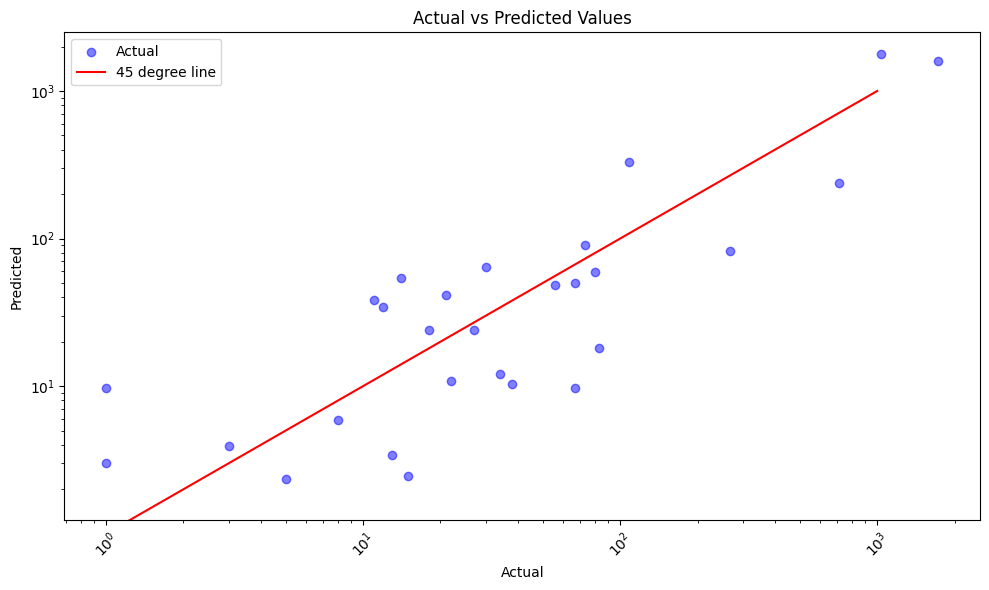

RMSE: 68.68408508146022


In [354]:

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

# Plot actual vs predicted with pairwise connections
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual', alpha=0.5)


# plt.scatter(, , color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#scale log
plt.xscale('log')
plt.yscale('log')
# start at 0, end at 3000
# plt.xlim(0, 3000)
# plt.ylim(0, 3000)
# make it a 45 degree line
plt.plot([0, 1000], [0, 1000], color='red', label='45 degree line')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output RMSE
print(f"RMSE: {rmse}")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

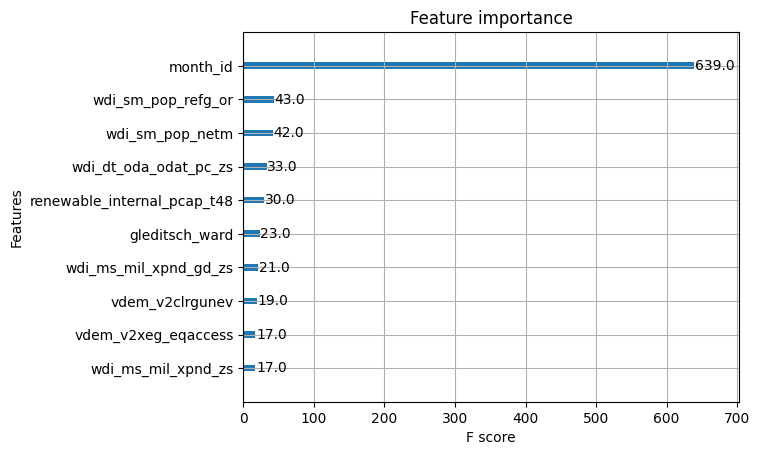

In [349]:
from xgboost import plot_importance

# plot
plot_importance(bst,max_num_features=10)

In [350]:
# for each timeseries plot the actual and predicted values
import matplotlib.pyplot as plt
# map back id to country name
# country_id = index + 1
# y_test.reset_index(inplace=True, drop=True)
# y_test = y_test.to_frame()
# y_test['country_id'] = y_test.index + 1



In [351]:
# map country_id to country name
# country_list = pd.read_csv('data/country_list.csv') 
# country_list
# y_test["country_name"] = y_test["country_id"].map(country_list.set_index('country_id')['name'])
# y_test